# Week 4 - Regular Neural Networks

## Starting off with the simplest example, simple perseptron with one input

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def error(y_tilde, y):
    return 0.5*(y_tilde - y)**2

In [3]:
def feed_forward(x):
    z = x*weight + bias
    a = z #We drop the sigmoid function
    
    return a

In [4]:
def backpropagation(x, y):
    a = feed_forward(x)
    
    #Now the derivatives
    dCda = a - y
    dadz = 1
    dzdw = x
    dzdb = 1
    
    dCdw = dCda*dadz*dzdw
    dCdb = dCda*dadz*dzdb
    
    return dCdw, dCdb

Now generate data

In [5]:
x = 4.0
y = 2*x + 1.0

Now let us define the neural network itself:

In [6]:
weight = np.random.randn() 
bias = np.random.randn()

Now let us do the training itself!

In [7]:
eta = 0.1
for i in range(30):
    dCdw, dCdb = backpropagation(x, y)
    weight -= eta*dCdw
    bias -= eta*dCdb
    
    y_tilde = weight*x + bias
    print(error(y_tilde, y))

21.482000681422
10.52618033389679
5.15782836360943
2.527335898168624
1.2383945901026263
0.6068133491502885
0.297338541083643
0.14569588513098547
0.07139098371418261
0.03498158201994929
0.01714097518977528
0.008399077842989934
0.004115548143065133
0.0020166185901018697
0.0009881431091499004
0.00048419012348342906
0.00023725316050688026
0.0001162540486483632
5.696448383770365e-05
2.7912597080468153e-05
1.367717256942568e-05
6.701814559021184e-06
3.2838891339208357e-06
1.6091056756199349e-06
7.884617810533219e-07
3.8634627271612776e-07
1.893096736311212e-07
9.276174007955543e-08
4.5453252638982165e-08
2.2272093793213733e-08


Let us try to plot it!

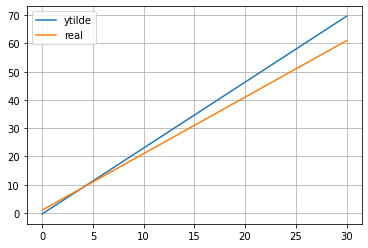

In [8]:
x_test = np.linspace(0, 30, 50)

def y_tilde(x):
    return weight*x + bias

def y(x):
    return 2*x + 1

plt.plot(x_test, y_tilde(x_test), label="ytilde")
plt.plot(x_test, y(x_test), label="real")
plt.legend()
plt.grid(1)

It is clear that one input is no good to approximate a whole function. However, we managed to approximate that one point x=4 really well to out desired value. In order to approximate whole function, we need to expand our model to take multiple inputs.

## Trying out with multiple inputs and outputs

All we have to change now is just the size of inputs and outputs, and also the shape of weights and biases. To do this, since we are adding just more inputs and outputs, we simply define a vector off all the inputs.

In [29]:
x = np.linspace(0, 6, 50)
y = np.sin(x)#2*x**2 + 1.0

n_inputs = len(x)

weight = np.random.randn(n_inputs)
bias = np.random.randn(n_inputs)

And now simply run the training again!

In [33]:
eta = 0.01
for i in range(70):
    dCdw, dCdb = backpropagation(x, y)
    weight -= eta*dCdw
    bias -= eta*dCdb
    
    y_tilde = weight*x + bias
    print(np.mean(error(y_tilde, y)))

0.10447522505794771
0.09924751468914705
0.09440679307965913
0.08991461848764729
0.08573724391067544
0.08184494126235059
0.07821143766539371
0.07481344280363023
0.07163025068682191
0.06864340257505888
0.06583640044022768
0.0631944623976543
0.060704313158643164
0.0583540038361138
0.05613275645706159
0.054030829354623326
0.05203940027284446
0.050150464552319765
0.04835674620057309
0.046651620007434724
0.04502904315846811
0.043483495041031446
0.042009924137593746
0.040603701067212616
0.039260576974814276
0.03797664658406472
0.036748315327183596
0.03557227004727153
0.034445452838224734
0.033365037646242476
0.032328409307049374
0.031333144735693555
0.030376996022331442
0.02945787521874961
0.028573840627316827
0.027723084427280192
0.0269039214933808
0.026114779279138637
0.02535418865223675
0.02462077558255343
0.023913253594828876
0.02323041690794338
0.022571134191531037
0.02193434287832309
0.02131904397735564
0.02072429733910935
0.020149217328880704
0.019592968869305262
0.019054763817041794
0

Look at the results now

In [34]:
y_tilde = weight*x + bias
# 
print(np.mean(error(y_tilde, y))) #Pretty neat

0.010885735761244901


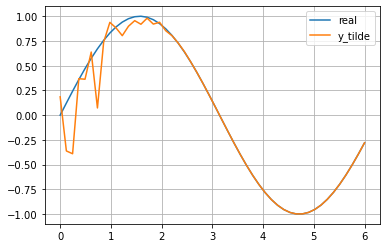

In [35]:
plt.plot(x, y, label="real")
plt.plot(x, y_tilde, label="y_tilde")
plt.legend()
plt.grid(1)

Fits like a perfectly fitted winter glove <3

Okey one interesting part, why does the start fit so poorly? And as the x increases, the fit gets better and better?

## What if our function has multiple features, that is what if our function is multivariable?

In this case, all we have to do, is to just increase the dimensionality of input and output data. In addition, increase dimensionality in weights as well. This time, instead of working just with vectors, we need to introduce matrices. 

Our function now is:

$$y = f(x_0, x_1) = x_0^2 + 3x_0x_1 + x_1^2 + 5$$

In [56]:
x_0, x_1 = np.linspace(0, 6, 50), np.linspace(0, 6, 50)
X = np.array([x_0, x_1])

y = X[0]**2 + 3*x[0]*x[1] + x[1]**2 + 5

n_inputs = np.shape(X)[1]
n_features = np.shape(X)[0]

weight = np.random.randn(n_features, n_inputs)
bias = np.random.randn(n_features, n_inputs)

Here you should do meshgrid stuff, but the main principle here is that you can add features.

In [66]:
eta = 0.01
for i in range(100):
    dCdw, dCdb = backpropagation(X, y)
    weight -= eta*dCdw
    bias -= eta*dCdb
    
    y_tilde = weight*x + bias
    print(np.mean(error(y_tilde, y)))

120.76176399699285
73.04666735795989
47.36649551225349
32.76993654301416
23.987146013206626
18.398576358708606
14.652929885783955
12.024048005163698
10.104432535900655
8.655128057053203
7.529884184813319
6.635523597092933
5.910472912008709
5.3126960138733
4.812659785081649
4.3890871862077105
4.026307782015733
3.7125544836498325
3.4388384701595465
3.198187705061598
2.985120173974875
2.795272281613506
2.625132031092148
2.4718443445100564
2.333066929145573
2.2068621279948175
2.091614765680407
1.9859690284266764
1.888779455935383
1.7990725178610905
1.7160162154921748
1.63889582984192
1.5670944218694165
1.5000770394784289
1.4373778399657824
1.3785895234215289
1.3233546113280525
1.271358208587391
1.2223219658145519
1.1759990186532163
1.13216972690207
1.0906380718682445
1.0512285981366376
1.0137838077391623
0.9781619319227643
0.9442350193954028
0.9118872908640635
0.8810137184677227
0.8515187958092889
0.823315470056745
0.7963242122881106
0.7704722061102907
0.7456926377550539
0.721924073477646


The results

In [67]:

# X0, X1 = np.meshgrid(x_0, x_1)
# Y = X0**2 + 3*X0*X1 + X1**2 + 5

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.plot_surface(X0, X1, Y, label="Real")


# plt.show()

#Ork 